In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [2]:
# Load the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('C:/Users/Yukta/Desktop/desktop files/self_study/github/machine_learning_disease/Project2/Datasets/parkinsons.csv')

# Print the first 5 rows of the dataframe
print(parkinsons_data.head())

# Number of rows and columns in the dataframe
print(parkinsons_data.shape)

# Get more information about the dataset
print(parkinsons_data.info())

# Check for missing values in each column
print(parkinsons_data.isnull().sum())

# Get some statistical measures about the data
print(parkinsons_data.describe())

# Distribution of target variable
print(parkinsons_data['status'].value_counts())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

<AxesSubplot: xlabel='status', ylabel='count'>

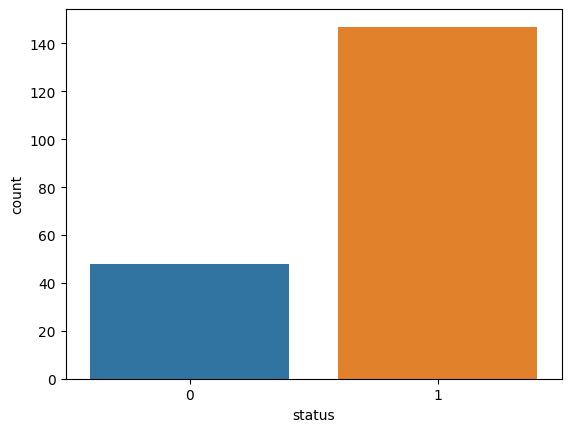

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "status", data = parkinsons_data)

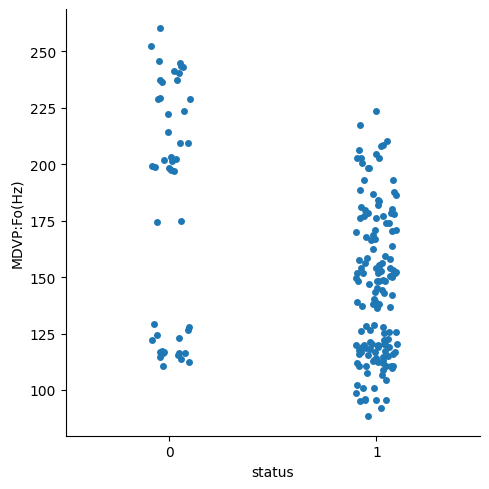

In [4]:
sns.catplot(x = "status", y = "MDVP:Fo(Hz)", data = parkinsons_data)

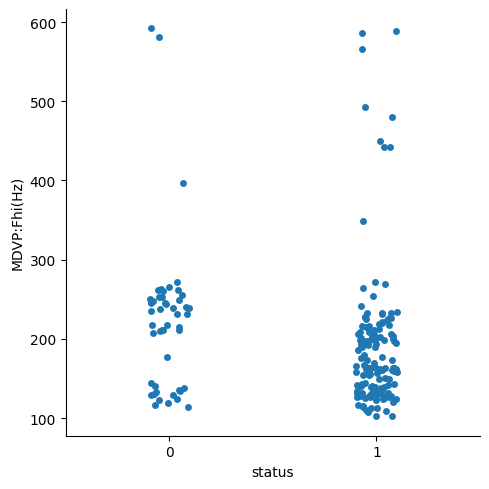

In [5]:
sns.catplot(x = "status", y = "MDVP:Fhi(Hz)", data = parkinsons_data)

In [6]:
# Separating the features and target
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

# Print X and Y
print(X)
print(Y)


     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Print the shapes of the data
print(X.shape, X_train.shape, X_test.shape)


(195, 22) (156, 22) (39, 22)


In [8]:
# Define the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=2)

# Train the model with the training data
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [9]:
# Accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data:', training_data_accuracy)

# Accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data:', test_data_accuracy)


Accuracy score of training data: 1.0
Accuracy score of test data: 0.8205128205128205


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, median_absolute_error

In [12]:
accuracies = {}

In [21]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, Y_train)

y_pred2 = svc.predict(X_test)

acc2=accuracy_score(Y_test,y_pred2)
accuracies['SVM']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(Y_train, svc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(Y_test,y_pred2)*100,"%")
acc = accuracy_score(Y_test,y_pred2)

Training accuracy score of the model is: 81.41025641025641 %
Testing accuracy score of the model is: 84.61538461538461 %


In [14]:
print("Classification Report")
print(classification_report(Y_test,X_test_prediction))
print("Confusion Matrix")
print(confusion_matrix(Y_test, X_test_prediction))

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39

Confusion Matrix
[[ 5  3]
 [ 4 27]]


<AxesSubplot: >

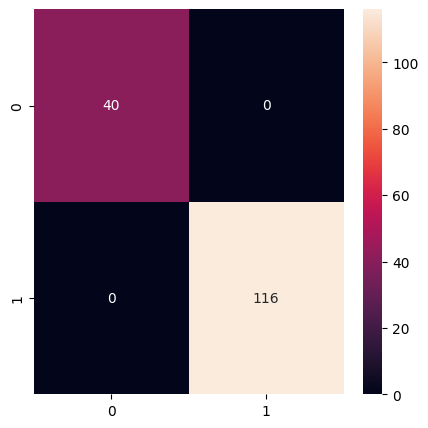

In [15]:
plt.figure(figsize = (5,5))

sns.heatmap(confusion_matrix(X_train_prediction, Y_train), annot = True, fmt = "g")

In [19]:
accuracies={}
lr = LogisticRegression(penalty='l2')
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)

acc=accuracy_score(Y_test,y_pred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(Y_train, lr.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(Y_test,y_pred)*100,"%")
acc7 = accuracy_score(Y_test,y_pred)

Training accuracy score of the model is: 87.82051282051282 %
Testing accuracy score of the model is: 87.17948717948718 %


c:\Users\Yukta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

y_pred3 = dtc.predict(X_test)

acc3=accuracy_score(Y_test,y_pred3)
accuracies['DT']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(Y_train, dtc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(Y_test,y_pred3)*100,"%")
acc3 = accuracy_score(Y_test,y_pred3)

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 76.92307692307693 %


In [18]:
print("Confusion matrix of the model",confusion_matrix(Y_test,y_pred3))

print("Classification Report",classification_report(Y_test,y_pred3))

Confusion matrix of the model [[ 7  1]
 [ 9 22]]
Classification Report               precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.96      0.71      0.81        31

    accuracy                           0.74        39
   macro avg       0.70      0.79      0.70        39
weighted avg       0.85      0.74      0.77        39



In [22]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',  'SVM',  'Decision Tree','Random Forest'],
    'Score': [acc7, acc, acc3, test_data_accuracy]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.871795
1,SVM,0.846154
3,Random Forest,0.820513
2,Decision Tree,0.769231


c:\Users\Yukta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


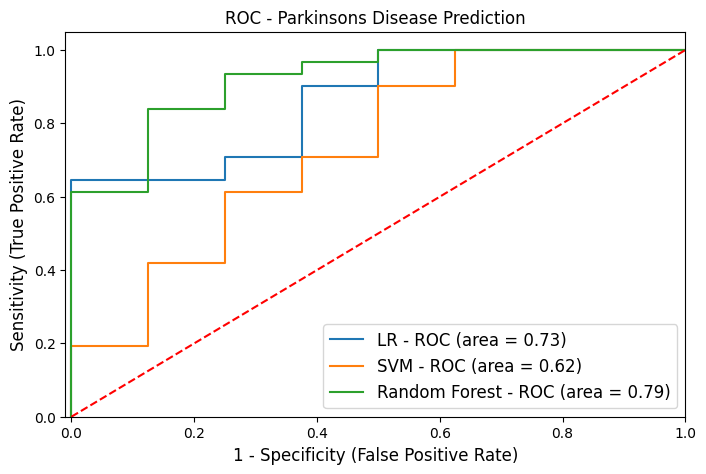

In [25]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
##    'label': 'DT',
#    'model': dtc,
#},
{
    'label': 'SVM',
    'model': svc,
},

{
    'label': 'Random Forest',
    'model': model,
}
]
for m in models:
    model = m['model']
    model.fit(X_train, Y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Parkinsons Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [26]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


In [ ]:
# Function to predict Parkinson's disease
def predict_parkinsons(input_data):
    # Change input data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # Reshape the numpy array
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    # Make prediction
    prediction = model.predict(input_data_reshaped)
    if prediction[0] == 0:
        print("The Person does not have Parkinson's Disease")
    else:
        print("The Person has Parkinson's Disease")

# Test the predictive system
input_data = (197.07600, 206.89600, 192.05500, 0.00289, 0.00001, 0.00166, 0.00168, 0.00498, 0.01098, 0.09700, 0.00563, 0.00680, 0.00802, 0.01689, 0.00339, 26.77500, 0.422229, 0.741367, -7.348300, 0.177551, 1.743867, 0.085569)
predict_parkinsons(input_data)


The Person does not have Parkinson's Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
import pickle
filename = 'parkinsons_model_randomforest.sav'
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open('parkinsons_model_randomforest.sav', 'rb'))